# Evaluación 2 parte 1

**Integrantes:**

+ Integrante 1: Juan Diego Arévalo Durán : juan.arevalo2101@alumnos.ubiobio.cl
+ Integrante 2: Matías Rodrigo Muñoz Silva  : matias.munoz2201@alumnos.ubiobio.cl
+ Integrante 3: Matías Ignacio Vilches Bravo : matias.vilches2201@alumnos.ubiobio.cl

**Fecha de Entrega:** 15 de Mayo 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- Pandas (2.2.2)
- Numpy (2.0.2)
- Matplotlib (3.10.0)
- Seaborn (0.13.2)
- Scipy (1.15.2)


In [14]:
#INGRESO DE LIBRERIAS
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
import seaborn as sb
print(sb.__version__)
import pickle

import sklearn
print(sklearn.__version__)
#INGRESO DE LIBRERIAS ESPECIFICAS
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

2.2.2
2.0.2
3.10.0
0.13.2
1.6.1


In [15]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-16 00:02:01--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv.1’

dataset_regresion.c 100%[===================>] 498.32K  --.-KB/s    in 0.008s  

2025-05-16 00:02:01 (60.0 MB/s) - ‘dataset_regresion.csv.1’ saved [510280/510280]



In [16]:
# **
# Leer el archivo dataset_regresion.csv
#
data = pd.read_csv("dataset_regresion.csv", sep=",")

# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [17]:
# Obtener la cantidad de filas y columnas (observaciones y características de los datos)
data.shape

(10000, 9)

---
✅ **Interpretación**

---

+ Se encuestó a 10000 trabajadores
+ Cada trabajador tienen 9 caracteristicas

In [18]:
# Nombre de las columnas
data.columns

Index(['ID', 'Edad', 'Nivel_Educativo', 'Experiencia_Anios', 'Departamento',
       'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto',
       'Salario_Mensual'],
      dtype='object')

---
✅ **Interpretación**

---


+ ID: Número de identificación del empleado.
+ Edad: Edad del empleado.
+ Nivel Educativo: Es el nivel educativo que posee cada empleado, de los cuales puede ser Universitaria, Técnica, Secundaria, Postgrado.
+ Experiencia en años: Cantidad de años que lleva trabajando.
+ Departamento: Departamento en donde se desempeña.
+ Horas entrenamiento mensual: Cantidad de horas destinadas, mensualmente, a capacitación.
+ Satisfacción laboral: Es el nivel de satisfacción laboral que posee cada empleado, de los cuales puede ser Muy Alta, Alta, Media, Baja.
+ Remoto: Modalidad de trabajo del empleado.
+ Salario mensual: Sueldo mensual, expresado en miles de pesos.

In [19]:
# Obtiene las primeras 5 observaciones
data.head()

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60


In [20]:
# Obtiene detalles de las columnas (características de los diamantes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Edad                         10000 non-null  int64  
 2   Nivel_Educativo              10000 non-null  object 
 3   Experiencia_Anios            10000 non-null  int64  
 4   Departamento                 10000 non-null  object 
 5   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 6   Satisfaccion_Laboral         10000 non-null  object 
 7   Remoto                       10000 non-null  object 
 8   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


In [21]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

,0
ID,0
Edad,0
Nivel_Educativo,0
Experiencia_Anios,0
Departamento,0
Horas_Entrenamiento_Mensual,0
Satisfaccion_Laboral,0
Remoto,0
Salario_Mensual,0


In [22]:
# Usaremos un método resumen de estadísticas numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10000.0,5000.500000,2886.895680,1.00,2500.7500,5000.500,7500.2500,10000.00
Edad,10000.0,41.557600,13.749581,18.00,30.0000,41.500,53.0000,65.00
Experiencia_Anios,10000.0,20.461600,13.239760,0.00,9.0000,20.000,32.0000,40.00
Horas_Entrenamiento_Mensual,10000.0,10.000000,3.183711,0.00,8.0000,10.000,12.0000,23.00
Salario_Mensual,10000.0,5764.693974,1659.896370,1773.68,4364.3675,5788.975,7177.2925,9641.94


In [23]:
# Obtenemos la correlacion de las variables respecto a el salario mensual (Nuestra variable objetivo la cual pretendemos predecir)
corr_matrix = data[data.describe().columns].corr()
corr_matrix["Salario_Mensual"].sort_values(ascending=False)

,Salario_Mensual
Salario_Mensual,1.000000
Experiencia_Anios,0.954013
Edad,0.943406
Horas_Entrenamiento_Mensual,0.014064
ID,-0.005383


In [24]:
# Obtiene registros que incumplen con reglas naturales del negocio
data.query('Edad<18 or Salario_Mensual==0 or Horas_Entrenamiento_Mensual<0')

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual


+ No se aprecian datos que incumplan las reglas naturales del negocio

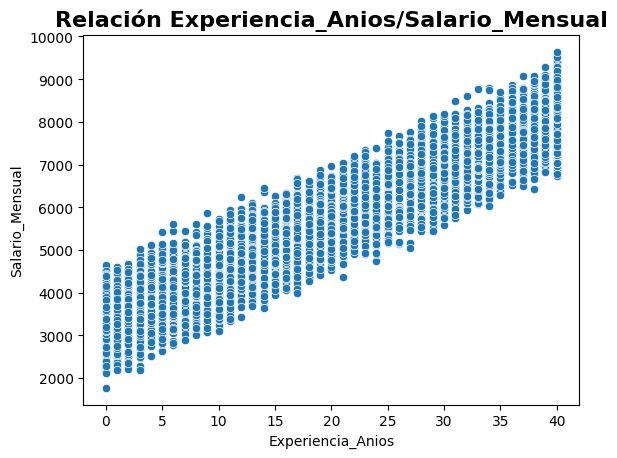

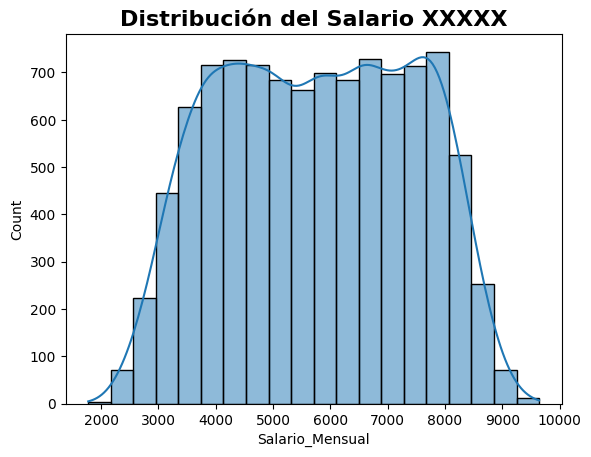

In [25]:
# Diagrama de dispersión de la variable Salario_Mensual respecto a la variable Experiencia_Anios
sb.scatterplot(x=data.Experiencia_Anios , y=data.Salario_Mensual)
plt.title("Relación Experiencia_Anios/Salario_Mensual", fontsize=16, fontweight="bold")
plt.show()

# Histograma de la variable Salario_Mensual
sb.histplot(data.Salario_Mensual, bins=20, kde=True)
plt.title("Distribución del Salario XXXXX", fontsize=16, fontweight="bold")
plt.show()

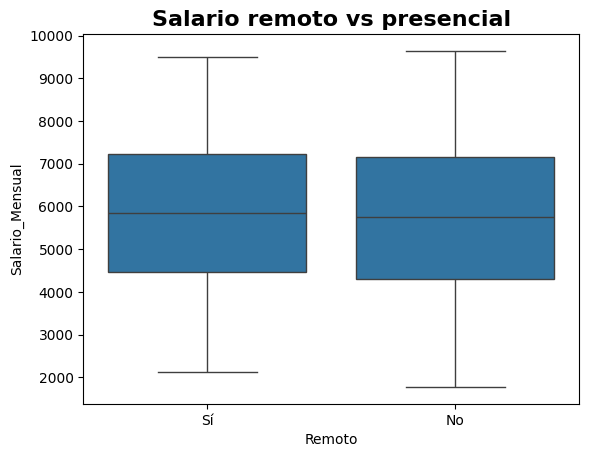

Promedio de salario para empleados remotos: $5841.92
Promedio de salario para empleados presenciales: $5711.07


In [26]:
# ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?
sb.boxplot(x=data.Remoto, y=data.Salario_Mensual)
plt.title("Salario remoto vs presencial", fontsize=16, fontweight="bold")
plt.show()

# Promedio del salario para empleados remotos
promedio_remoto = data[data['Remoto'] == 'Sí']['Salario_Mensual'].mean()

# Promedio del salario para empleados presenciales
promedio_presencial = data[data['Remoto'] == 'No']['Salario_Mensual'].mean()

print(f"Promedio de salario para empleados remotos: ${promedio_remoto:.2f}")
print(f"Promedio de salario para empleados presenciales: ${promedio_presencial:.2f}")

### Pregunta clave

+ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

+ No, ya que se aprecia una minima diferencia entre el promedio salarial de los trabajadores remoto con respecto a los que no son remotos pero ésta no es significativa ya que es una diferencia de aproximadamente 2.26%.

# Fase 3 - Preparación de los datos

In [27]:
#Obtiene las columnas a codificar
categoricalfeatures = data.describe(include = np.object_).columns
#Usa OrdinalEncoder
for feature in categoricalfeatures:
  encoder = OrdinalEncoder(categories=[data[feature].unique()])
  data[f'{feature}_codificado'] = encoder.fit_transform(data[[feature]])

data

,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual,Nivel_Educativo_codificado,Departamento_codificado,Satisfaccion_Laboral_codificado,Remoto_codificado
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50,0.0,0.0,0.0,0.0
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40,0.0,1.0,1.0,1.0
2,3,32,Técnica,13,TI,8,Media,No,4883.02,1.0,1.0,2.0,1.0
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09,2.0,2.0,0.0,1.0
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,34,Técnica,13,Ventas,9,Alta,No,4363.37,1.0,3.0,0.0,1.0
9996,9997,47,Técnica,29,Marketing,5,Baja,No,5880.12,1.0,0.0,3.0,1.0
9997,9998,56,Técnica,32,Recursos Humanos,13,Alta,No,6270.87,1.0,4.0,0.0,1.0
9998,9999,24,Universitaria,5,Finanzas,17,Media,Sí,4122.12,0.0,2.0,2.0,0.0


In [28]:
data_final = data.drop(categoricalfeatures, axis=1)
X = data_final.drop(["Salario_Mensual"], axis=1)
X.head()

,ID,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Nivel_Educativo_codificado,Departamento_codificado,Satisfaccion_Laboral_codificado,Remoto_codificado
0,1,56,38,11,0.0,0.0,0.0,0.0
1,2,46,23,17,0.0,1.0,1.0,1.0
2,3,32,13,8,1.0,1.0,2.0,1.0
3,4,60,37,7,2.0,2.0,0.0,1.0
4,5,25,7,8,0.0,0.0,0.0,0.0


In [29]:
y = data_final["Salario_Mensual"]
y.head()

,Salario_Mensual
0,8230.50
1,6375.40
2,4883.02
3,6739.09
4,4729.60


In [30]:
# Separación en data de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2003)

# Fase 4 - Modelamiento

## Considerando la totalidad de características disponibles

---
📈 LINEAR REGRESION

---

In [31]:
def interpretacion(algoritmo : str, caracteristicas : np.array, score : float):
  return f"""Modelo de regresión {algoritmo}
   {score :.2%} de la variabilidad en los salarios mensuales se puede explicar utilizando las {len(caracteristicas)} características
   Características elegidas :{caracteristicas.values}."""

In [32]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

LinearRegression()

In [33]:
# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

R squared of the Linear Regression on training set: 91.92%
R squared of the Linear Regression on test set: 91.66%


In [34]:
# Interpretación en el negocio
print(interpretacion("Regresión lineal", X_train.columns, linreg.score(X_test, y_test)))

Modelo de regresión Regresión lineal
   91.66% de la variabilidad en los salarios mensuales se puede explicar utilizando las 8 características
   Características elegidas :['ID' 'Edad' 'Experiencia_Anios' 'Horas_Entrenamiento_Mensual'
 'Nivel_Educativo_codificado' 'Departamento_codificado'
 'Satisfaccion_Laboral_codificado' 'Remoto_codificado'].


---
Observaciones

---
-

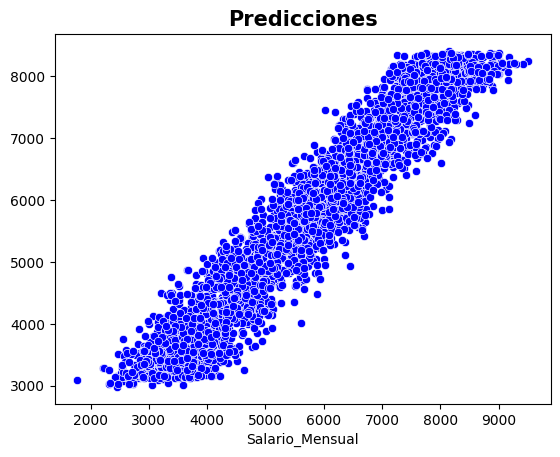

In [35]:
# Realiza predicciones
y_pred = linreg.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

---
✅ Interpretación

---

+ Los puntos están bastante alineados a lo largo de la diagonal creciente, lo cual indica una buena correlación entre los valores reales y predichos.
+ Los errores de predicción no son muy grandes en general.
+ En ciertas zonas los puntos se alejan más de la diagonal, lo cual puede indicar que el modelo esta subestimando o sobreestimando en ciertos rangos del salario
+ La forma alargada y lineal sugiere que la relación entre las variables es aproximadamente lineal, lo cual valida el uso del modelo de regresión lineal.

In [36]:
# Guarda resultados
history = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

---
🌳DecisionTreeRegressor

---

In [37]:
# Creación del modelo
model_tree = DecisionTreeRegressor(max_depth=7,random_state=2002)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=2002)

In [38]:
# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

R squared of the Decision Tree Regressor on training set: 95.79%
R squared of the Decision Tree Regressor on test set: 95.32%


In [39]:
# Interpretación en el negocio
print(interpretacion("Árbol de decisión", X_train.columns, model_tree.score(X_test, y_test)))

Modelo de regresión Árbol de decisión
   95.32% de la variabilidad en los salarios mensuales se puede explicar utilizando las 8 características
   Características elegidas :['ID' 'Edad' 'Experiencia_Anios' 'Horas_Entrenamiento_Mensual'
 'Nivel_Educativo_codificado' 'Departamento_codificado'
 'Satisfaccion_Laboral_codificado' 'Remoto_codificado'].


---
Observaciones

---

-

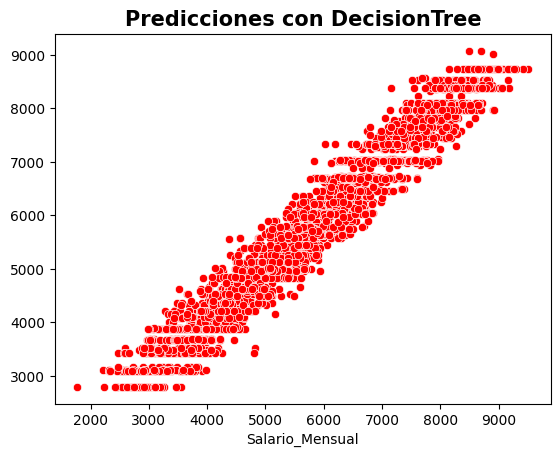

In [40]:

# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

---
✅ Interpretación

---

+ Los puntos siguen una tendencia creciente, lo cual indica que el modelo ha capturado correctamente la relación general entre las variables.
+ Se puede observar que muchos valores predichos se repiten de manera exacta generando esas franjas horizontales.
+ No está generalizando con valores continuos, sino que está haciendo predicciones a partir de reglas aprendidas de los datos.

In [41]:
# Guarda resultados
history["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]

---
🎲🌳RandomForestRegressor

---

In [42]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=30, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30, random_state=29)

In [43]:
# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))

R squared of the Random Forest Regressor on training set: 99.38%
R squared of the Random Forest Regressor on test set: 96.05%


In [44]:
# Interpretación en el negocio
print(interpretacion("RandomForest", X_train.columns, model_rf.score(X_test, y_test)))

Modelo de regresión RandomForest
   96.05% de la variabilidad en los salarios mensuales se puede explicar utilizando las 8 características
   Características elegidas :['ID' 'Edad' 'Experiencia_Anios' 'Horas_Entrenamiento_Mensual'
 'Nivel_Educativo_codificado' 'Departamento_codificado'
 'Satisfaccion_Laboral_codificado' 'Remoto_codificado'].


---
Observaciones

---

Text(0.5, 1.0, 'Predicciones con RandomForest')

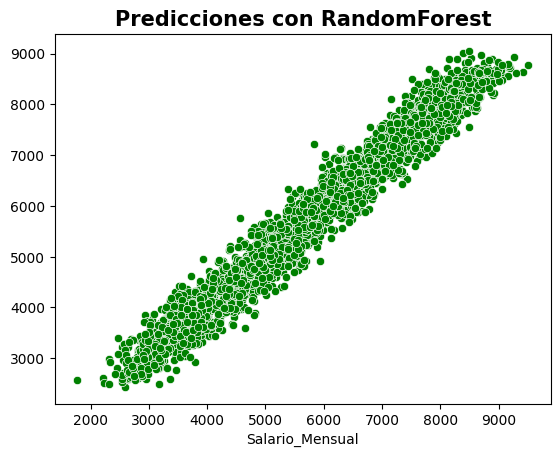

In [45]:
y_pred_rf = model_rf.predict(X_test)
sb.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold")

---
✅ Interpretación

---

+ Los puntos están muy próximos a una línea recta diagonal, lo que indica que el modelo está realizando predicciones precisas.
+ En general está realizando predicciones más precisas que el modelo LinearRegression.
+ A diferencia del modelo DecisionTreeRregressor, RandomForest no tiene franjas horizontales y las predicciones se ven mas continuas.

In [46]:
# Guarda resultados
history["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]

In [47]:
history
# Convertir a DataFrame
df = pd.DataFrame([
    {'Modelo': key, 'Descripción': val[0], 'Score': val[1]}
    for key, val in history.items()
])

# Mostrar tabla
print(df)

                  Modelo                                        Descripción  \
0       LinearRegression                                 LinearRegression()   
1  DecisionTreeRegressor  DecisionTreeRegressor(max_depth=7, random_stat...   
2  RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   

      Score  
0  0.916634  
1  0.953184  
2  0.960487  


Selecciona de forma autom´atica y correctamente el mejor modelo.

In [49]:
def get_bestModel( history : dict):
  # Inicializar una variable para almacenar el mayor valor
  mayor_valor = float('-inf')

  # Recorrer el diccionario
  for modelo, data in history.items():
    # Comparar el segundo elemento de la lista (data[1] almacena el score) con el mayor encontrado hasta ahora
    if data[1] > mayor_valor:
        mayor_valor = data[1]
        best_model = data[0]

  return best_model, mayor_valor, modelo

best_model, best_score, name_model = get_bestModel(history)
print("El mejor rendimiento es: {0:.2%} y le corresponde a {1}".format(best_score, name_model))

El mejor rendimiento es: 96.05% y le corresponde a RandomForestRegressor


Conclusión del R^2 más alto
+ El mejor rendimiento lo obtuvo RandomForestRegressor el cual nos dice que puede predecir con una precision del 96.05% el sueldo de los trabajadores de PeopleGrow Solutions

## Con selección de características por parte del equipo

In [48]:
# POR COMPLETAR
# Vamos a trabajar con las caracteristicas de experiencia años, nivel educativo y departamento.
# la razón es que son en nuestra opinion las variables que más influyen en el salario mensual.

## Considerando la totalidad de características disponibles

# Fase 5 - Evaluación

## Carga de archivo JSON con datos completamente nuevos

## Generación de JSON con las predicciones del mejor modelo